## London Tourism Analysis (all classification model draft)

### Group members:
- Ziyi Zhao
- Hongbo Liu
- Erya Ouyang
- Jingze Zhang
- Leo Liu

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
london = pd.read_csv('london_index.csv')

In [4]:
london.head(5)

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,PI,econ,busi,gove,educ,heal,safe,pers,soci,envi
0,2007,Q1,Belgium,<15 nights,Air,Holiday,0.753385,0.087581,0.753385,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
1,2007,Q1,Belgium,<15 nights,Air,Business,4.625445,1.555299,6.869618,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
2,2007,Q1,Belgium,<15 nights,Air,VFR,1.225540,0.048458,1.793118,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
3,2007,Q1,Belgium,<15 nights,Air,Miscellaneous,1.023070,0.208063,1.776455,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929
4,2007,Q1,Belgium,<15 nights,Sea,Holiday,6.439640,0.438086,8.448400,72.956291,77.120262,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929


## Exploration

First, we did some exploration on the data. The distribution of international visitors data is skewness.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


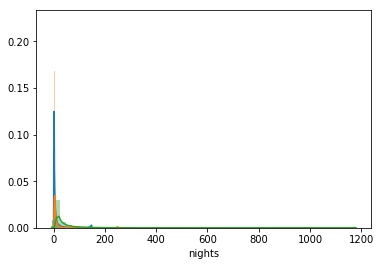

In [6]:
sns.distplot(london['visits'])
sns.distplot(london['spend'])
sns.distplot(london['nights'])

In [7]:
london['visits'].describe()

count    37174.000000
mean         4.872056
std          9.781225
min          0.000087
25%          0.864026
50%          1.768055
75%          4.300872
max        148.192745
Name: visits, dtype: float64

In [8]:
london.loc[london['visits'].idxmax()]

year              2010
quarter             Q4
market          France
dur_stay    <15 nights
mode            Tunnel
purpose        Holiday
visits         148.193
spend          41.1873
nights          346.32
PI             72.6224
econ           75.7305
busi           64.5721
gove           69.0646
educ           74.0197
heal            80.711
safe           79.9651
pers           76.9328
soci           55.7264
envi           76.8789
Name: 12352, dtype: object

In [9]:
london['spend'].describe()

count    37174.000000
mean         3.041566
std          6.542163
min          0.000000
25%          0.362559
50%          1.126347
75%          3.079309
max        252.552031
Name: spend, dtype: float64

In [10]:
london.loc[london['spend'].idxmax()]

year                2017
quarter               Q3
market      Saudi Arabia
dur_stay      <15 nights
mode                 Air
purpose          Holiday
visits           20.3505
spend            252.552
nights           226.758
PI               57.5148
econ             63.3526
busi             55.2251
gove             42.4763
educ              60.057
heal             77.8395
safe             66.1604
pers             37.4861
soci             53.6364
envi             61.3999
Name: 36255, dtype: object

In [11]:
london['nights'].describe()

count    37174.000000
mean        29.184371
std         55.654958
min          0.000261
25%          4.097167
50%         10.758644
75%         29.194040
max       1172.003716
Name: nights, dtype: float64

In [12]:
london.loc[london['nights'].idxmax()]

year               2014
quarter              Q2
market              USA
dur_stay    15+  nights
mode                Air
purpose           Study
visits          10.3359
spend           63.1344
nights             1172
PI              73.1917
econ            75.4683
busi            75.8496
gove            68.0569
educ            79.6115
heal             78.463
safe            72.1386
pers            73.5056
soci            66.0886
envi             69.543
Name: 24925, dtype: object

### New Features

We created two columns to calculate nights per visit and spend per visit.

In [13]:
london_1 = london.copy()

In [14]:
london_1['nightspervisit'] = london_1['nights']/london_1['visits']

In [15]:
london_1['spendpervisit'] = london_1['spend']/london_1['visits']

In [16]:
london_1.head()

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,PI,...,busi,gove,educ,heal,safe,pers,soci,envi,nightspervisit,spendpervisit
0,2007,Q1,Belgium,<15 nights,Air,Holiday,0.753385,0.087581,0.753385,72.956291,...,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929,1.000000,0.116250
1,2007,Q1,Belgium,<15 nights,Air,Business,4.625445,1.555299,6.869618,72.956291,...,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929,1.485180,0.336248
2,2007,Q1,Belgium,<15 nights,Air,VFR,1.225540,0.048458,1.793118,72.956291,...,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929,1.463125,0.039540
3,2007,Q1,Belgium,<15 nights,Air,Miscellaneous,1.023070,0.208063,1.776455,72.956291,...,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929,1.736396,0.203372
4,2007,Q1,Belgium,<15 nights,Sea,Holiday,6.439640,0.438086,8.448400,72.956291,...,66.91304,73.608398,78.600838,81.348824,78.137978,85.221649,59.498726,56.156929,1.311937,0.068030


In [17]:
london_1['nightspervisit'].describe()

count    37174.000000
mean        10.287924
std         20.615972
min          0.020088
25%          2.474923
50%          4.827564
75%          9.565308
max        356.998624
Name: nightspervisit, dtype: float64

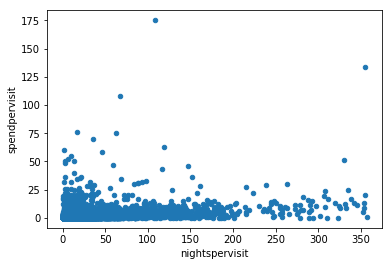

In [18]:
london_1.plot.scatter(x='nightspervisit', y='spendpervisit')

There are some outliers here.

In [19]:
lowspend = london_1.loc[london_1['spendpervisit'] < london_1['spendpervisit'].quantile(0.05)]

In [20]:
bad =lowspend.loc[lowspend['nightspervisit'] > london_1['nightspervisit'].quantile(0.95)]

In [21]:
bad.head()

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,PI,...,busi,gove,educ,heal,safe,pers,soci,envi,nightspervisit,spendpervisit
177,2007,Q1,Spain,15+ nights,Air,Business,0.530157,0.007725,26.543699,70.841774,...,59.830273,67.208260,70.257942,80.298950,76.741783,86.134651,56.393642,67.100739,50.067617,0.014571
1327,2007,Q2,Other Asia,15+ nights,Air,Holiday,0.529238,0.007442,42.758499,51.434590,...,42.258223,38.092098,52.274449,65.782844,61.081953,48.152661,45.016279,52.923450,80.792574,0.014062
1424,2007,Q2,United Arab Emirates,15+ nights,Air,Miscellaneous,0.358202,0.005015,13.253500,61.101753,...,52.791737,48.831989,59.942955,77.575127,80.370216,49.087570,52.181820,62.051483,37.000071,0.014000
2752,2007,Q4,Switzerland,15+ nights,Air,VFR,0.297124,0.000000,92.108398,76.102150,...,71.499596,79.685928,76.621262,82.215889,81.970047,82.079239,61.285454,72.694366,309.999862,0.000000
2865,2007,Q4,Other Eastern Europe,<15 nights,Tunnel,VFR,1.369580,0.000000,59.511299,58.557903,...,46.372450,49.825510,62.613741,70.659870,70.565286,62.877428,44.372782,56.550217,43.452225,0.000000


There are some tourists who stayed a longer period in London but spend extremely less.

## Data Manipulation

### Standardization

We standarized index data.

In [22]:
london_2 = london.copy()

In [23]:
for col_name in london_2.columns[6:19]:
    new_col_name = col_name + '_std'
    london_2[new_col_name] = (london_2[col_name] - london_2[col_name].mean())/london_2[col_name].std()

In [24]:
london_2.head()

,year,quarter,market,dur_stay,mode,purpose,visits,spend,nights,PI,...,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
0,2007,Q1,Belgium,<15 nights,Air,Holiday,0.753385,0.087581,0.753385,72.956291,...,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
1,2007,Q1,Belgium,<15 nights,Air,Business,4.625445,1.555299,6.869618,72.956291,...,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
2,2007,Q1,Belgium,<15 nights,Air,VFR,1.225540,0.048458,1.793118,72.956291,...,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
3,2007,Q1,Belgium,<15 nights,Air,Miscellaneous,1.023070,0.208063,1.776455,72.956291,...,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
4,2007,Q1,Belgium,<15 nights,Sea,Holiday,6.439640,0.438086,8.448400,72.956291,...,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508


In [25]:
london_2 = london_2.drop(london_2.columns[6:19],axis=1)

In [26]:
london_2.head()

,year,quarter,market,dur_stay,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
0,2007,Q1,Belgium,<15 nights,Air,Holiday,-0.421079,-0.451530,-0.510844,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
1,2007,Q1,Belgium,<15 nights,Air,Business,-0.025213,-0.227183,-0.400948,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
2,2007,Q1,Belgium,<15 nights,Air,VFR,-0.372808,-0.457511,-0.492162,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
3,2007,Q1,Belgium,<15 nights,Air,Miscellaneous,-0.393508,-0.433114,-0.492461,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
4,2007,Q1,Belgium,<15 nights,Sea,Holiday,0.160265,-0.397954,-0.372581,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508


In [27]:
london_3 = london_2.drop(['quarter'], axis = 1)

In [28]:
london_4 = london_3[london_3["year"] < 2017]

In [29]:
london_4.count()

year          33909
market        33909
dur_stay      33909
mode          33909
purpose       33909
visits_std    33909
spend_std     33909
nights_std    33909
PI_std        33909
econ_std      33909
busi_std      33909
gove_std      33909
educ_std      33909
heal_std      33909
safe_std      33909
pers_std      33909
soci_std      33909
envi_std      33909
dtype: int64

In [31]:
london_4.tail()

,year,market,dur_stay,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
33904,2016,Other Africa,<15 nights,Air,VFR,-0.418963,-0.108175,-0.371385,-1.90829,-2.170408,-1.746874,-1.609777,-2.735826,-2.295509,-1.434222,-1.160696,-1.184234,-0.921138
33905,2016,Other Africa,<15 nights,Air,Miscellaneous,-0.446752,-0.454169,-0.452183,-1.90829,-2.170408,-1.746874,-1.609777,-2.735826,-2.295509,-1.434222,-1.160696,-1.184234,-0.921138
33906,2016,Other Africa,15+ nights,Air,Business,-0.432957,-0.349874,-0.240599,-1.90829,-2.170408,-1.746874,-1.609777,-2.735826,-2.295509,-1.434222,-1.160696,-1.184234,-0.921138
33907,2016,Other Africa,15+ nights,Air,VFR,-0.327472,-0.306922,0.111848,-1.90829,-2.170408,-1.746874,-1.609777,-2.735826,-2.295509,-1.434222,-1.160696,-1.184234,-0.921138
33908,2016,Other Africa,15+ nights,Tunnel,Study,-0.440052,-0.412842,-0.259119,-1.90829,-2.170408,-1.746874,-1.609777,-2.735826,-2.295509,-1.434222,-1.160696,-1.184234,-0.921138


In [32]:
Y = london_4['dur_stay']

In [33]:
X = london_4.drop(['dur_stay'], axis = 1)

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()

In [35]:
X.iloc[:, 1] = labelencoder_X.fit_transform(X.iloc[:, 1])
X.iloc[:, 2] = labelencoder_X.fit_transform(X.iloc[:, 2])
X.iloc[:, 3] = labelencoder_X.fit_transform(X.iloc[:, 3])

In [36]:
X.head()

,year,market,mode,purpose,visits_std,spend_std,nights_std,PI_std,econ_std,busi_std,gove_std,educ_std,heal_std,safe_std,pers_std,soci_std,envi_std
0,2007,4,0,1,-0.421079,-0.451530,-0.510844,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
1,2007,4,0,0,-0.025213,-0.227183,-0.400948,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
2,2007,4,0,4,-0.372808,-0.457511,-0.492162,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
3,2007,4,0,2,-0.393508,-0.433114,-0.492461,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508
4,2007,4,1,1,0.160265,-0.397954,-0.372581,0.722575,0.972559,0.619921,0.782733,1.011442,0.728396,0.439758,0.991503,0.593672,-1.013508


Text(0,0.5,'Number of occurrences')

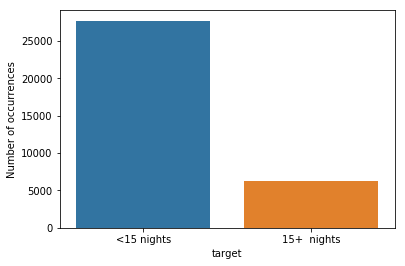

In [37]:
sns.countplot(Y);
plt.xlabel('target');
plt.ylabel('Number of occurrences')

In [38]:
pd.DataFrame(X).isnull().sum()

year          0
market        0
mode          0
purpose       0
visits_std    0
spend_std     0
nights_std    0
PI_std        0
econ_std      0
busi_std      0
gove_std      0
educ_std      0
heal_std      0
safe_std      0
pers_std      0
soci_std      0
envi_std      0
dtype: int64

In [39]:
np.isfinite(X.all())

year          True
market        True
mode          True
purpose       True
visits_std    True
spend_std     True
nights_std    True
PI_std        True
econ_std      True
busi_std      True
gove_std      True
educ_std      True
heal_std      True
safe_std      True
pers_std      True
soci_std      True
envi_std      True
dtype: bool

There are no null values in our training dataset. Now we can start to encoding categorical variables.

In [40]:
onehotencoder = OneHotEncoder(categorical_features = [1,2,3])
X = onehotencoder.fit_transform(X).toarray()

In [41]:
# Encoding the Dependent Variable
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [42]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Applying PCA

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 12)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [45]:
explained_variance

array([0.50152429, 0.13241758, 0.04630211, 0.03155565, 0.02799404,
       0.02334361, 0.02051303, 0.01782966, 0.01663395, 0.01443927,
       0.01245222, 0.01044125])

## Building Models

We built several kinds of classification models, including Logistic Regression, Decision Tree Classification, Random Forest Classification, K Nearest Neighbors, Naive Bayes, Kernal SVM. For each model, we plotted two confusion matrixes and used K-fold cross validation to verify its accurancy and variance.

### Logistic Regression

In [46]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
Y_pred = classifier.predict(X_test)

Logistic Regression Confusion matrix, without normalization
[[ 946  585]
 [  98 6849]]
Logistic Regression Normalized confusion matrix
[[0.62 0.38]
 [0.01 0.99]]


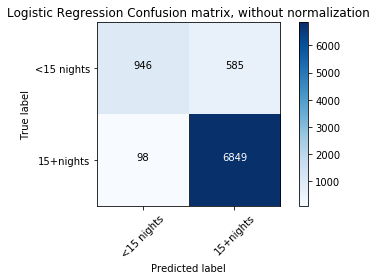

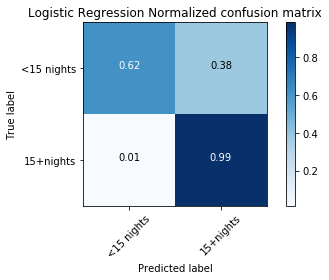

In [48]:
import itertools
from sklearn.metrics import confusion_matrix

class_names = ['<15 nights','15+nights']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Logistic Regression Normalized confusion matrix")
    else:
        print('Logistic Regression Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic Regression Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic Regression Normalized confusion matrix')

plt.show()

In [49]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.91      0.62      0.73      1531
  15+nights       0.92      0.99      0.95      6947

avg / total       0.92      0.92      0.91      8478



In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.9213955477857217

In [51]:
accuracies.std()

0.005058801508573623

This model has low bias and low variance.

### Decision Tree Classification

In [52]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [53]:
Y_pred_dt = classifier_dt.predict(X_test)

Decision Tree Confusion matrix, without normalization
[[ 984  547]
 [ 544 6403]]
Decision Tree Normalized confusion matrix
[[0.64 0.36]
 [0.08 0.92]]


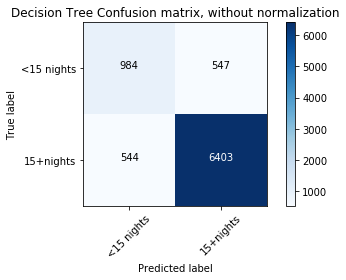

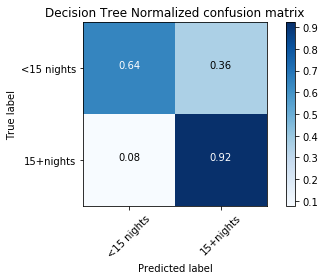

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Decision Tree Normalized confusion matrix")
    else:
        print('Decision Tree Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred_dt)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Decision Tree Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Decision Tree Normalized confusion matrix')

plt.show()

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_dt, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.64      0.64      0.64      1531
  15+nights       0.92      0.92      0.92      6947

avg / total       0.87      0.87      0.87      8478



In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_dt, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.8648505103381184

In [57]:
accuracies.std()

0.006652096826807104

### Random Forest Classification

In [58]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [59]:
Y_pred_rf = classifier_rf.predict(X_test)

Random Forest Confusion matrix, without normalization
[[ 881  650]
 [ 118 6829]]
Random Forest Normalized confusion matrix
[[0.58 0.42]
 [0.02 0.98]]


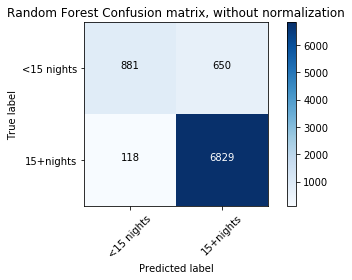

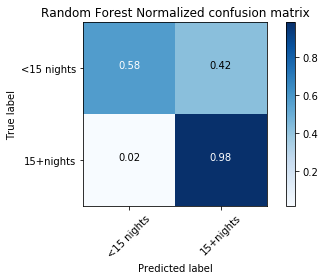

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Random Forest Normalized confusion matrix")
    else:
        print('Random Forest Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred_rf)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Random Forest Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Random Forest Normalized confusion matrix')

plt.show()

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.88      0.58      0.70      1531
  15+nights       0.91      0.98      0.95      6947

avg / total       0.91      0.91      0.90      8478



In [62]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.906060087572583

In [63]:
accuracies.std()

0.0058341224644709476

### K-Nearest Neighbors (KNN)

In [64]:
# Fitting classifier to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [65]:
Y_pred_knn = classifier_knn.predict(X_test)

KNN Confusion matrix, without normalization
[[ 810  721]
 [ 383 6564]]
KNN Normalized confusion matrix
[[0.53 0.47]
 [0.06 0.94]]


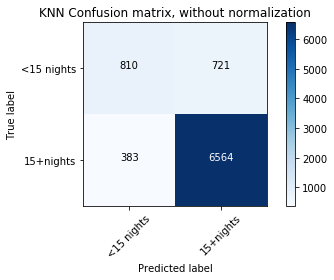

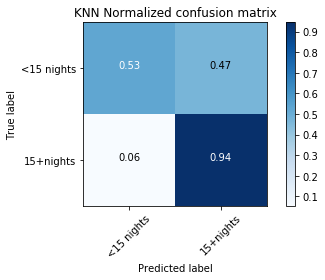

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("KNN Normalized confusion matrix")
    else:
        print('KNN Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred_knn)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='KNN Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='KNN Normalized confusion matrix')

plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.68      0.53      0.59      1531
  15+nights       0.90      0.94      0.92      6947

avg / total       0.86      0.87      0.86      8478



In [68]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_knn, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.8641030830318067

In [69]:
accuracies.std()

0.006527493737279315

### Naive Bayes

In [70]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [71]:
Y_pred_nb = classifier_nb.predict(X_test)

Naive Bayes Confusion matrix, without normalization
[[ 356 1175]
 [ 129 6818]]
Naive Bayes Normalized confusion matrix
[[0.23 0.77]
 [0.02 0.98]]


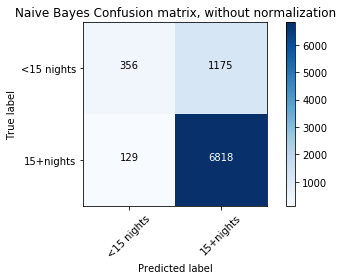

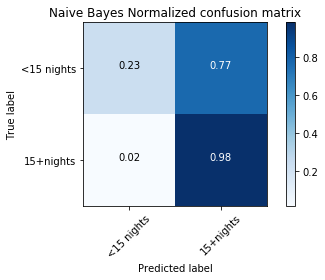

In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Naive Bayes Normalized confusion matrix")
    else:
        print('Naive Bayes Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred_nb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Naive Bayes Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Naive Bayes Normalized confusion matrix')

plt.show()

In [73]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_nb, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.73      0.23      0.35      1531
  15+nights       0.85      0.98      0.91      6947

avg / total       0.83      0.85      0.81      8478



In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_nb, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.8439699227748821

In [75]:
accuracies.std()

0.005606149554283901

### Kernel SVM (Support Vector Machine)

In [76]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 0)
classifier_ksvm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
Y_pred_ksvm = classifier_ksvm.predict(X_test)

Kernal SVM Confusion matrix, without normalization
[[ 849  682]
 [  30 6917]]
Kernal SVM Normalized confusion matrix
[[0.55 0.45]
 [0.   1.  ]]


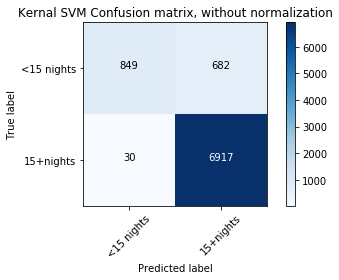

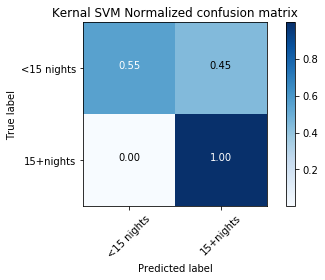

In [78]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Kernal SVM Normalized confusion matrix")
    else:
        print('Kernal SVM Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred_ksvm)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Kernal SVM Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Kernal SVM Normalized confusion matrix')

plt.show()

In [79]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ksvm, target_names=class_names)) 

             precision    recall  f1-score   support

 <15 nights       0.97      0.55      0.70      1531
  15+nights       0.91      1.00      0.95      6947

avg / total       0.92      0.92      0.91      8478



In [82]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_ksvm, X = X_train, y = Y_train, cv = 10)
accuracies.mean()

0.9150254590020761

In [83]:
accuracies.std()

0.004591510781927118

Based on all the scores and validations, we choose logistic regression and random forest model for further improvement.